In [5]:
import pandas as pd
import numpy as np
from math import *
import matplotlib.pyplot as plt
import matplotlib
import matplotlib
import scipy.stats

In [6]:
def load_ces(file):
    df_ces = pd.read_table(file)
    ces = df_ces.sum()[2:]
    return pd.DataFrame(ces,columns=['ces'])

def load_data(file, cat=None):    
    df = pd.read_table(file)
    patients = df['COMMON']
    df = df.transpose()[2:]
    df.columns = [s + '_' +cat for s in patients]
    return df

def load_mutation(file):
    df = pd.read_table(file)[['Sample ID', 'Mutation Count', 'CNA']]
    return df

In [7]:
genes = list(pd.read_table('data/uterus/mmr_expr.txt')['COMMON'])
genes

['MLH1', 'MLH3', 'MSH2', 'MSH3', 'MSH6', 'PCNA', 'PMS2', 'RFC1']

In [17]:
# df1 = load_data('data/uterus/', cat='meth')
# df1.head()

,MLH1_meth,MLH3_meth,MSH2_meth,MSH3_meth,MSH6_meth,PCNA_meth,PMS2_meth,RFC1_meth
TCGA-BR-8370-01,0.0228193,0.0320085,0.0318651,0.103415,0.0212566,0.0433578,0.0175772,0.0219151
TCGA-D7-6521-01,0.0204145,0.0614712,0.0239722,0.0875652,0.0225079,0.0323054,0.0216822,0.0223222
TCGA-KB-A6F7-01,0.0207573,0.050202,0.0190618,0.0822726,0.0205524,0.0354551,0.0198874,0.0198977
TCGA-BR-4294-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-BR-4271-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df2 = load_ces('data/uterus/ces_expr.txt')
df2.head()

,ces
TCGA-DI-A1BU-01,6.0778
TCGA-EY-A1GX-01,-9.9261
TCGA-AX-A2IN-01,23.7522
TCGA-EO-A22U-01,7.171
TCGA-AX-A3FZ-01,15.1682


In [14]:
df3 = load_data('data/uterus/mmr_expr.txt', cat='expr')
df3.head()

,MLH1_expr,MLH3_expr,MSH2_expr,MSH3_expr,MSH6_expr,PCNA_expr,PMS2_expr,RFC1_expr
TCGA-DI-A1BU-01,-0.7846,-0.6889,1.1935,-0.9678,0.0058,0.9044,1.3735,0.505
TCGA-EY-A1GX-01,0.9397,-0.4783,-0.4168,0.5984,-0.6572,-0.4569,1.3385,-0.0354
TCGA-AX-A2IN-01,-1.1447,0.8612,1.886,-1.1261,1.7626,3.4032,-0.299,1.0905
TCGA-EO-A22U-01,1.9683,-1.8589,0.7724,0.2864,0.5368,0.9893,-0.2735,1.8954
TCGA-AX-A3FZ-01,1.3526,-0.6594,2.9642,-1.1262,2.4071,3.3609,1.8715,0.39


In [10]:
df4 = load_data('data/uterus/mmr_mutation.txt', cat='mut')
df4.head()

,MLH1_mut,MLH3_mut,MSH2_mut,MSH3_mut,MSH6_mut,PCNA_mut,PMS2_mut,RFC1_mut
TCGA-BK-A0C9-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-AP-A052-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-D1-A17T-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-BG-A0VX-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-BS-A0U9-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df5 = load_mutation('data/uterus/cna_mutation.txt')
df5.head()

,Sample ID,Mutation Count,CNA
0,TCGA-AP-A1DH-01,NaN,0.000010
1,TCGA-AP-A1DK-01,NaN,0.000309
2,TCGA-AP-A1DM-01,NaN,0.041525
3,TCGA-AP-A1DO-01,NaN,0.214360
4,TCGA-AP-A1DP-01,NaN,0.034148


In [15]:
#df = df5.merge(df1, left_on='Sample ID', right_index=True)
df = df5.merge(df2, left_on='Sample ID', right_index=True)
df = df.merge(df3, left_on='Sample ID', right_index=True)
df = df.merge(df4, left_on='Sample ID', right_index=True)
df.head()

,Sample ID,Mutation Count,CNA,ces,MLH1_expr,MLH3_expr,MSH2_expr,MSH3_expr,MSH6_expr,PCNA_expr,PMS2_expr,RFC1_expr,MLH1_mut,MLH3_mut,MSH2_mut,MSH3_mut,MSH6_mut,PCNA_mut,PMS2_mut,RFC1_mut
14,TCGA-AX-A1C7-01,40.0,0.368916,-0.9669,-0.9247,-2.6334,-1.5291,-1.4954,3.602,-0.057,-1.8929,-0.8051,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
321,TCGA-AX-A05W-01,44.0,0.221578,0.3508,-0.6542,0.4362,-0.6099,-0.8934,-0.7539,-0.7624,1.3502,-1.9693,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
366,TCGA-B5-A0JR-01,439.0,0.118704,8.5725,-1.3307,2.1734,0.0095,-1.5233,-0.6543,0.361,1.2713,-0.7527,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
391,TCGA-B5-A0JN-01,96.0,0.527893,5.145,-0.0258,-1.37,0.7416,-0.756,-0.1797,-0.1252,-0.6385,1.3295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
397,TCGA-B5-A0K9-01,525.0,0.118269,-0.1328,-1.3985,1.6265,0.2853,0.0701,0.3395,-0.6492,-1.0525,-0.2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# MSI status in function of gene expression

If the tumor is is in the lower 5% for one gene expression, it is labelled as MSI.

In [16]:
df['msi_status'] = np.zeros(len(df))
for g in genes:
    limit = df[g+'_expr'].quantile(0.05)
    for ix in df[df[g+'_expr']<limit]['msi_status'].index:
        df = df.set_value(ix,'msi_status',1)
    
df.head()

,Sample ID,Mutation Count,CNA,ces,MLH1_expr,MLH3_expr,MSH2_expr,MSH3_expr,MSH6_expr,PCNA_expr,...,RFC1_expr,MLH1_mut,MLH3_mut,MSH2_mut,MSH3_mut,MSH6_mut,PCNA_mut,PMS2_mut,RFC1_mut,msi_status
14,TCGA-AX-A1C7-01,40.0,0.368916,-0.9669,-0.9247,-2.6334,-1.5291,-1.4954,3.602,-0.057,...,-0.8051,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
321,TCGA-AX-A05W-01,44.0,0.221578,0.3508,-0.6542,0.4362,-0.6099,-0.8934,-0.7539,-0.7624,...,-1.9693,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
366,TCGA-B5-A0JR-01,439.0,0.118704,8.5725,-1.3307,2.1734,0.0095,-1.5233,-0.6543,0.361,...,-0.7527,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
391,TCGA-B5-A0JN-01,96.0,0.527893,5.145,-0.0258,-1.37,0.7416,-0.756,-0.1797,-0.1252,...,1.3295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
397,TCGA-B5-A0K9-01,525.0,0.118269,-0.1328,-1.3985,1.6265,0.2853,0.0701,0.3395,-0.6492,...,-0.2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


# MSI status in function of mutation

If one the the gene in the pathway is mutated, the tumor is classified as MSI.

In [17]:
for g in genes:
    no_mutations = pd.isnull(df[g+'_mut'])
    for ix in no_mutations[no_mutations==False].index:
        df = df.set_value(ix,'msi_status',1)
df.head()

,Sample ID,Mutation Count,CNA,ces,MLH1_expr,MLH3_expr,MSH2_expr,MSH3_expr,MSH6_expr,PCNA_expr,...,RFC1_expr,MLH1_mut,MLH3_mut,MSH2_mut,MSH3_mut,MSH6_mut,PCNA_mut,PMS2_mut,RFC1_mut,msi_status
14,TCGA-AX-A1C7-01,40.0,0.368916,-0.9669,-0.9247,-2.6334,-1.5291,-1.4954,3.602,-0.057,...,-0.8051,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
321,TCGA-AX-A05W-01,44.0,0.221578,0.3508,-0.6542,0.4362,-0.6099,-0.8934,-0.7539,-0.7624,...,-1.9693,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
366,TCGA-B5-A0JR-01,439.0,0.118704,8.5725,-1.3307,2.1734,0.0095,-1.5233,-0.6543,0.361,...,-0.7527,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
391,TCGA-B5-A0JN-01,96.0,0.527893,5.145,-0.0258,-1.37,0.7416,-0.756,-0.1797,-0.1252,...,1.3295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
397,TCGA-B5-A0K9-01,525.0,0.118269,-0.1328,-1.3985,1.6265,0.2853,0.0701,0.3395,-0.6492,...,-0.2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


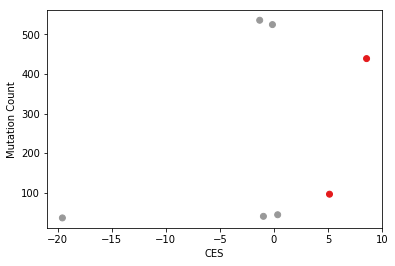

In [18]:
plt.scatter(df['ces'],df['Mutation Count'],c=df['msi_status'],cmap=plt.cm.Set1,marker='o')
plt.xlabel('CES')
plt.ylabel('Mutation Count')
plt.show()

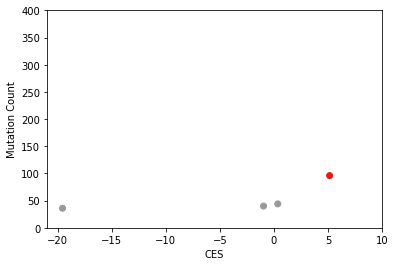

In [19]:
plt.scatter(df['ces'],df['Mutation Count'],c=df['msi_status'],cmap=plt.cm.Set1,marker='o')
plt.xlabel('CES')
plt.ylim(0,400)
plt.ylabel('Mutation Count')
plt.show()

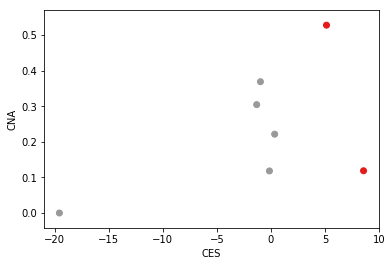

In [20]:
plt.scatter(df['ces'],df['CNA'],c=df['msi_status'],cmap=plt.cm.Set1,marker='o')
plt.xlabel('CES')
plt.ylabel('CNA')
plt.show()